In [2]:
import pandas as pd

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [50]:
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'], encoding='latin-1')

ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'] )

users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'])

In [4]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'], encoding='latin-1')

In [ ]:
 #encoding="ISO-8859-1"

In [ ]:
 #encoding='latin-1'

In [6]:
movies.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'],  encoding='latin-1')

ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'] )

users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'])

In [15]:
movies.head(1)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [14]:
ratings.head(1)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760


In [13]:
users.head(1)

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067


In [18]:
#merging
df1=pd.merge(users.drop('zip_code',axis=1),ratings.drop('timestamp',axis=1),on='userid')

master_data=pd.merge(df1,movies,on='movieid')

In [19]:
master_data.head()

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [21]:
master_data.shape

(1000209, 8)

In [23]:
master_data.age.value_counts(normalize=True)*100

25    39.547335
35    19.896142
18    18.349765
45     8.361552
50     7.247485
56     3.877190
1      2.720531
Name: age, dtype: float64

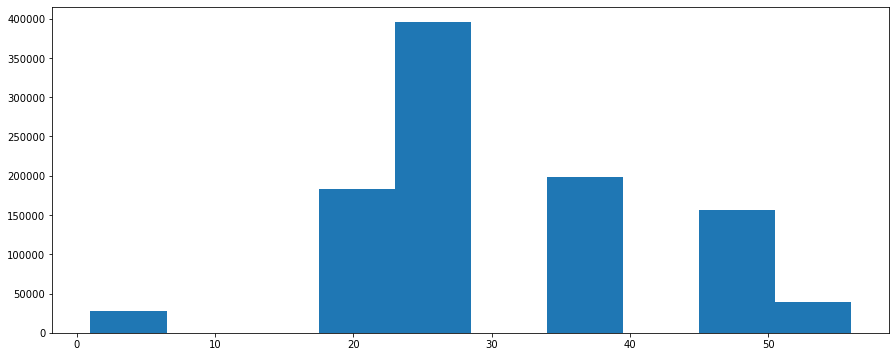

In [24]:
#1	"Under 18" 18	"18-24" 25	"25-34" 35	"35-44"  45	"45-49"  50	"50-55"  56	"56+" #Plot histogram

fig=plt.figure(figsize=(15,6))
plt.hist(master_data['age']);



In [27]:
#Explore 3
# 25 top movies
movie_rating=master_data[['title','rating']].groupby('title').mean().sort_values('rating',ascending=False)
movie_rating.head(25)

,rating
title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [29]:
#3User rating of the movie “Toy Story”
movie_rating.loc[['Toy Story (1995)']]


,rating
title,
Toy Story (1995),4.146846


In [30]:
#4 Find the ratings for all the movies reviewed by for a particular user of user id = 2696

master_data[master_data['userid']==2696]

,userid,gender,age,occupation,movieid,rating,title,genres
24345,2696,M,25,7,1270,2,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,M,25,7,1097,3,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,7,1617,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,7,800,5,Lone Star (1996),Drama|Mystery
273633,2696,M,25,7,3386,1,JFK (1991),Drama|Mystery
277808,2696,M,25,7,3176,4,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,M,25,7,1711,4,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,M,25,7,1589,3,Cop Land (1997),Crime|Drama|Mystery
598042,2696,M,25,7,1783,4,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,M,25,7,1892,4,"Perfect Murder, A (1998)",Mystery|Thriller


In [32]:
#Find out all the unique genres

movies['col_genres']=movies['genres'].apply(lambda x : str(x).split('|'))
movies.head()                                            

,movieid,title,genres,col_genres
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [33]:
#Feature Engineering: 1.Unique Genres
genres=[]
for i in movies['col_genres']:
    genres.extend(i)
    
genres=set(genres)
genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [35]:
#2.a one-hot encoding ( 1 and 0)
for i in genres:
    master_data[i]=master_data['genres'].apply(lambda x : 1 if i in x else 0)

master_data.head(1)

,userid,gender,age,occupation,movieid,rating,title,genres,Drama,Sci-Fi,Western,Crime,Horror,Documentary,Fantasy,Musical,Film-Noir,Adventure,Thriller,War,Children's,Comedy,Animation,Romance,Action,Mystery
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
master_data.corr()

,userid,age,occupation,movieid,rating,Drama,Sci-Fi,Western,Crime,Horror,Documentary,Fantasy,Musical,Film-Noir,Adventure,Thriller,War,Children's,Comedy,Animation,Romance,Action,Mystery
userid,1.000000,0.034688,-0.026698,-0.017739,0.012303,0.006572,-0.003283,0.004114,0.003469,-0.001392,-0.001064,0.002212,-0.000222,0.004701,-0.000683,-0.001107,0.003502,-0.004862,-0.003651,-0.007665,0.006834,-0.002023,0.004334
age,0.034688,1.000000,0.078371,0.027575,0.056869,0.063856,-0.010879,0.038177,-0.007931,-0.023901,0.004407,-0.024222,0.005158,0.033495,-0.016730,-0.014100,0.038446,-0.052858,-0.044046,-0.047020,0.017503,-0.030975,0.024308
occupation,-0.026698,0.078371,1.000000,0.008585,0.006753,-0.012326,0.026250,0.005924,0.002821,0.001439,-0.002689,0.001299,-0.007312,0.005246,0.014309,0.008981,0.010264,-0.006906,-0.006149,-0.003834,-0.014018,0.018347,0.002421
movieid,-0.017739,0.027575,0.008585,1.000000,-0.064042,-0.030856,-0.011747,0.003940,-0.061896,0.057613,-0.009544,-0.018792,-0.059381,-0.019655,-0.082413,-0.058418,-0.081951,-0.071589,0.061667,-0.014177,-0.118375,-0.042046,-0.028561
rating,0.012303,0.056869,0.006753,-0.064042,1.000000,0.122561,-0.044487,0.007311,0.033446,-0.094353,0.028098,-0.023312,0.015643,0.060259,-0.036718,-0.004806,0.075688,-0.039829,-0.039622,0.019670,0.009644,-0.047633,0.015848
Drama,0.006572,0.063856,-0.012326,-0.030856,0.122561,1.000000,-0.212747,-0.045945,0.070479,-0.189551,-0.062194,-0.096929,-0.094778,-0.067297,-0.194570,-0.153717,0.136582,-0.135707,-0.249840,-0.154479,0.023552,-0.202415,-0.027689
Sci-Fi,-0.003283,-0.010879,0.026250,-0.011747,-0.044487,-0.212747,1.000000,-0.010935,-0.083730,0.056505,-0.038568,0.121843,-0.068012,-0.004056,0.284190,0.102546,0.039314,-0.038844,-0.187079,-0.055526,-0.133752,0.319117,-0.028273
Western,0.004114,0.038177,0.005924,0.003940,0.007311,-0.045945,-0.010935,1.000000,-0.042711,-0.041784,-0.012974,-0.028199,-0.030245,-0.019816,-0.011964,-0.058897,-0.019803,-0.031269,0.007927,-0.030908,-0.044650,0.022242,-0.029727
Crime,0.003469,-0.007931,0.002821,-0.061896,0.033446,0.070479,-0.083730,-0.042711,1.000000,-0.047899,-0.026243,-0.033745,-0.061179,0.136237,-0.045924,0.115095,-0.079715,-0.081977,-0.078030,-0.062520,-0.073320,0.088519,0.080093
Horror,-0.001392,-0.023901,0.001439,0.057613,-0.094353,-0.189551,0.056505,-0.041784,-0.047899,1.000000,-0.025673,-0.055803,-0.018924,-0.039157,-0.057256,0.056629,-0.077985,-0.077099,-0.093064,-0.049730,-0.099434,-0.042733,-0.002423


In [38]:
#3.Determine the features affecting the ratings of any particular movie.
master_data.corr()[['rating']]

,rating
userid,0.012303
age,0.056869
occupation,0.006753
movieid,-0.064042
rating,1.000000
Drama,0.122561
Sci-Fi,-0.044487
Western,0.007311
Crime,0.033446
Horror,-0.094353


In [41]:
master_data.columns

Index(['userid', 'gender', 'age', 'occupation', 'movieid', 'rating', 'title',
       'genres', 'Drama', 'Sci-Fi', 'Western', 'Crime', 'Horror',
       'Documentary', 'Fantasy', 'Musical', 'Film-Noir', 'Adventure',
       'Thriller', 'War', 'Children's', 'Comedy', 'Animation', 'Romance',
       'Action', 'Mystery'],
      dtype='object')

In [42]:
#4.Develop an appropriate model to predict the movie ratings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
x=master_data[['age','Animation','Documentary','Film-Noir','Romance','Horror','Musical',"Children's",'Action','Adventure','Crime','Comedy',
               'Fantasy','Sci-Fi','Drama','War','Mystery','Thriller','Western']]
y=master_data['rating']  #Target/Label/y

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [46]:
model=LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
model.predict(x_test)

array([3.55606264, 3.73360014, 3.8393623 , ..., 3.67906109, 3.4158804 ,
       3.52628412])